In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import pandas as pd
import scFates as scf

%reload_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style

In [4]:
remove_genes = ['IGHM', 'CCL16', 'CCR3','CD3G','TH','NEUROD6','CD4','PLP1']

In [5]:
from scipy import sparse
def get_X(adata, cells, genes, layer, togenelist=False):
    if layer is None:
        if sparse.issparse(adata.X):
            X = adata[cells, genes].X.A
        else:
            X = adata[cells, genes].X
    else:
        if sparse.issparse(adata.layers[layer]):
            X = adata[cells, genes].layers[layer].A
        else:
            X = adata[cells, genes].layers[layer]

    if togenelist:
        return X.T.tolist()
    else:
        return X


In [7]:
WR_adata = sc.read_h5ad('GWlike_scfates.h5ad')
adata = sc.read_h5ad('../GBM_Linnarsson_EEL.h5ad')


In [8]:
a = ['Endothelial' if x.count('Endothelial') else x for x in adata.obs['m-states']]
adata.obs['m-states'] = pd.Categorical(['Mural' if x.count('Mural') else x for x in a])
#endo = allWR_adata[alldata.obs['m-states'] == 'Endothelial']

In [9]:
WR_adata.var['clusters'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object')

In [10]:
WR_adata.var['clusters'] = WR_adata.var.clusters.astype('category')
WR_adata.obs['seg'] = WR_adata.obs.seg.astype('category')

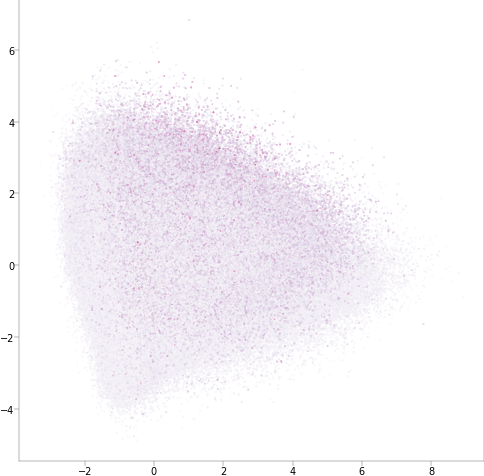

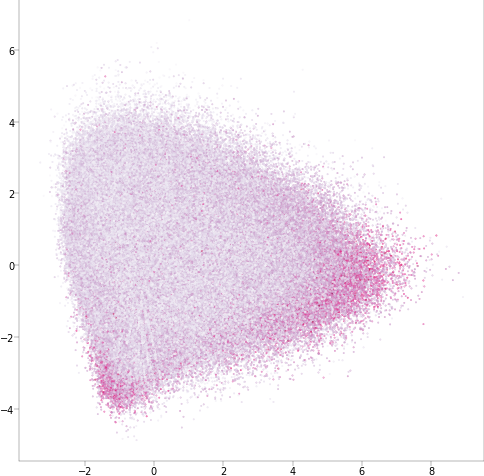

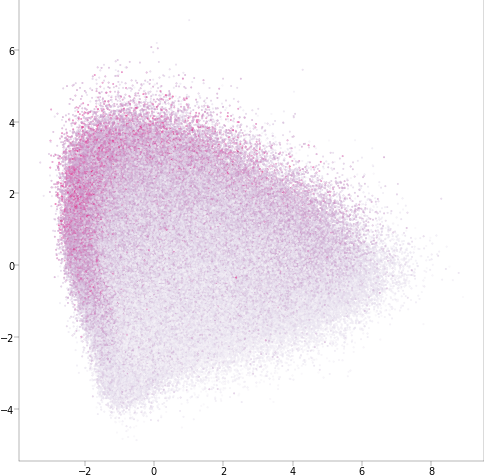

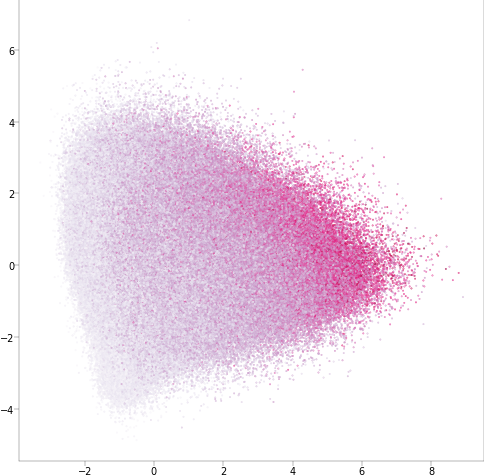

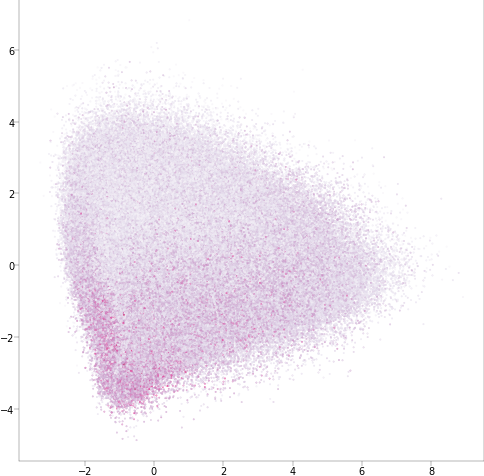

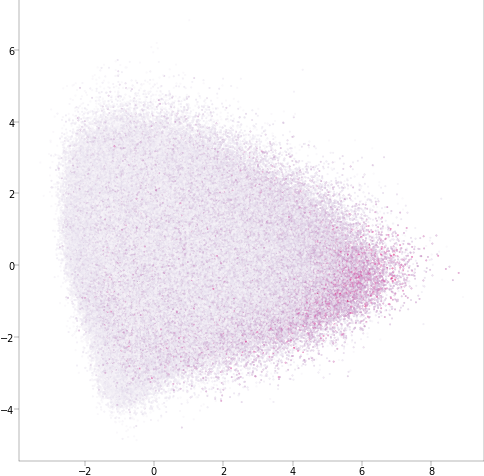

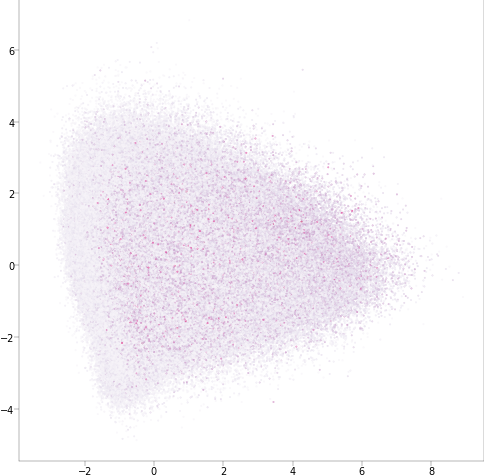

In [11]:
for c in WR_adata.var["clusters"].unique():  
    mean = WR_adata.raw[:,WR_adata.var_names[WR_adata.var.clusters== c]].X.mean(axis=1)#WR_adata[:,WR_adata.var_names[WR_adata.var.clusters== '2']]
    WR_adata.obs['mean_{}'.format(c)] = mean
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    # scatter with colormap mapping to z value
    ax.scatter(WR_adata.obsm['X_pca'][:,0],WR_adata.obsm['X_pca'][:,1],s=0.1,c=WR_adata.obs['mean_{}'.format(c)], cmap = 'PuRd')
    plt.show()

In [12]:
'''for c in WR_adata.var["clusters"].unique():
    scf.pl.trends(
        WR_adata,
        features=WR_adata.var_names[WR_adata.var.clusters==c],
        basis='pca',
        feature_cmap='PuRd',
        plot_emb=True,
        annot=None,
        pseudo_cmap = 'magma',
        #save='figures/cluster{}.pdf'.format(c)
    )'''


'for c in WR_adata.var["clusters"].unique():\n    scf.pl.trends(\n        WR_adata,\n        features=WR_adata.var_names[WR_adata.var.clusters==c],\n        basis=\'pca\',\n        feature_cmap=\'PuRd\',\n        plot_emb=True,\n        annot=None,\n        pseudo_cmap = \'magma\',\n        #save=\'figures/cluster{}.pdf\'.format(c)\n    )'

In [13]:
WR_adata.obsm['module_0'] = WR_adata.obs['mean_0'].values
WR_adata.obsm['module_2'] = WR_adata.obs['mean_2'].values
WR_adata.obsm['module_4'] = WR_adata.obs['mean_4'].values

In [40]:
palette_classes = {
    'AC-like 1':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    'AC-like 3':'#2ecc71',#inchworm B4FF9F
    'AC-like 4':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#2ecc71',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    'AC-like 8':'#2ecc71',#inchworm B4FF9F

    'preOPC-like 1':'#7befb2',#'#c2f970'

    'WR Endo.Ass.':'#e76d89',# Deep cerise
    'WR Periphery1':'#e76d89',# Deep cerise
    'WR Periphery2':'#e76d89',# Deep cerise
    'WR Periphery3':'#e76d89',# Deep cerise
    'WR HYP1':'#C50F53',# Deep cerise
    'WR HYP2':'#840034',# Deep cerise
    'WR nIPC':'#e76d89',# Deep cerise
    'WR OPC':'#e76d89',# Deep cerise
    
    'GBL-like 1':'#c2f970',
    'GBL-like 2':'#c2f970',
    
    #'nIPC-like 1':'#FFF192',
    #'nIPC-like 2':'#FFF192',
    #'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4', #bright turquoise
    'OPC-like 2':'#89c4f4', #bright turquoise
    
    'TAM-BDM 1':'#e3ba8f', #wood
    'TAM-BDM 2':'#e3ba8f',
    'TAM-BDM 3':'#e3ba8f',
    'TAM-BDM 4':'#e3ba8f', #wood

    'TAM-MG':'#a6915c',#red orange
    'Mono 1': '#f4ede4',
    'Mono 2': '#f4ede4',
    
    'Oligodendrocyte':'#392e4a',
    'Astrocyte':'#038aff',
    
    #'Endothelial':'#d5b8ff', #mauve
    'Mural cell': '#C8E683',  #electric indigo
    #'Mural': '#8c14fc',  #electric indigo
    
    'Endothelial': '#C8E683',# '#d5b8ff',  

    #'FB-like 1': '#9f5afd', #fff9de
    'FB-like 2': '#9f5afd', #fff9de
    'FB-like 3': '#9f5afd', #fff9de

}

In [38]:
rename_dic = {
    'GW-like 5':'WR Endo.Ass.',
    'GW-like 2':'WR Periphery1',
    'GW-like 3':'WR Periphery2',
    'GW-like 1':'WR Periphery3',
    
    'GW-like 6':'WR HYP1',
    'GW-like 8':'WR HYP2',
    'GW-like 7':'WR OPC',
    'GW-like 4':'WR nIPC',
    'nIPC-RG-like':'RG-like',
}

adata.obs['m-states3'] = pd.Categorical([rename_dic[m] if m in rename_dic else m for m in adata.obs['m-states2']])
adata.obs['m-states3'] = ['Endothelial' if ms.count('Endothelial') else ms for ms in adata.obs['m-states3']]
adata.obs['m-states3'] = ['Oligodendrocyte' if ms.count('Oligodendrocyte') else ms for ms in adata.obs['m-states3']]
adata.obs['m-states3'] = pd.Categorical(['Mural cell' if ms.count('Mural') else ms for ms in adata.obs['m-states3']])

INFO:root:First filter, 162450 cells left
INFO:root:Zoom filter, 162450 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


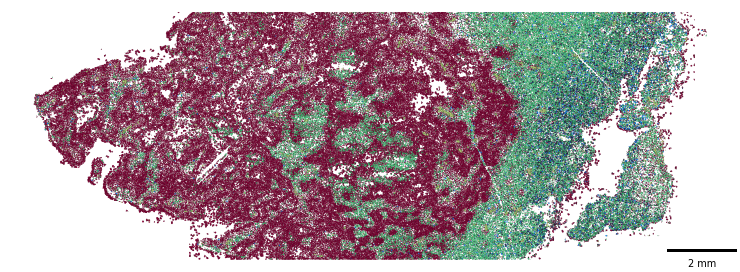

In [41]:
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key= 'm-states3',
    clusters = ['WR HYP1', 'WR HYP2', 'Astrocyte','Oligodendrocyte','AC-like 3','Mural cell','Endothelial'],
    palette=palette_classes,  
    figsize=(8,8),
    dpi=300,
    alpha=.95,
    show_scalebar=True,
    save=True,
    savepath='figures/SL035B_global.svg',
)

In [51]:
import numpy as np
modules = np.stack(
    [
        WR_adata.obs['mean_0'].values,
        WR_adata.obs['mean_2'].values,
        WR_adata.obs['mean_4'].values
    ]
)

modules = modules.T
modules_v = modules.argsort(axis=1)
modules_max = modules_v[:,-1]
WR_adata.obs['modules_max'] = pd.Categorical(modules_max)

INFO:root:First filter, 201869 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 8514 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 351 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


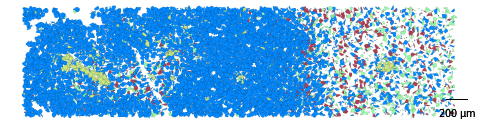

In [56]:
xlim = (11200, 15200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons(
    WR_adata,
    sample='SL035B',
    clusters = [0,1,2],
    cluster_key='modules_max',
    palette={0:'#93faa5', 1:'#af4154', 2:'#038aff'},
    xlim=xlim,
    ylim=ylim,
    #bgval_quant=0,
    alpha=1,
    show_axis=False,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=True,
    palette= {'Endothelial':'#C8E683',  'Mural': '#C8E683'},
    ax=ax,
)

plt.savefig('figures/module_max.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


In [61]:
print(WR_adata.obsm['module_0'].min(), WR_adata.obsm['module_0'].max())

-0.22822444 0.9147482


In [62]:
print(WR_adata.obsm['module_2'].min(), WR_adata.obsm['module_2'].max())

-0.25160763 1.3098173


In [63]:
print(WR_adata.obsm['module_4'].min(), WR_adata.obsm['module_4'].max())

-0.30467916 1.2957938


INFO:root:First filter, 156221 cells left


module_0 (156221, 387) KeysView(AxisArraysView with keys: X_R, X_pca, spatial, module_0, module_2, module_4)
0.5774818 -0.22822444


INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 6394 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:565: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_gray.plot(color=gray_color,edgecolor='black',linewidth=0.05,ax=ax1,rasterized=True,facecolor=facecolor, alpha=alpha_gray)
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 351 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


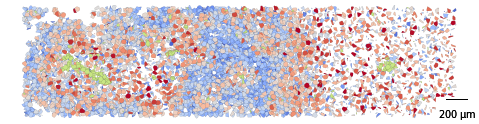

In [74]:
xlim = (11200, 15200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    WR_adata,
    sample='SL035B',
    clusters = ['GW-like 1','GW-like 8','GW-like 6','Endothelial'],
    cluster_key='m-states',
    key='module_0',
    cmap='coolwarm',
    xlim=xlim,
    ylim=ylim,
    bgval_quant=0,
    alpha=1,
    show_axis=False,
    normalize_values=False,
    vmin=np.quantile(WR_adata.obsm['module_0'].min(), .05),
    vmax=np.quantile(WR_adata.obsm['module_0'],.95),
    #figsize=(5,5),mquant=0.995,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=True,
    palette= {'Endothelial':'#C8E683',  'Mural': '#C8E683'},
    ax=ax,
)

plt.savefig('figures/module_0.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 156221 cells left


module_2 (156221, 387) KeysView(AxisArraysView with keys: X_R, X_pca, spatial, module_0, module_2, module_4)
0.6353507 -0.25160763


INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 6394 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:565: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_gray.plot(color=gray_color,edgecolor='black',linewidth=0.05,ax=ax1,rasterized=True,facecolor=facecolor, alpha=alpha_gray)
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 351 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


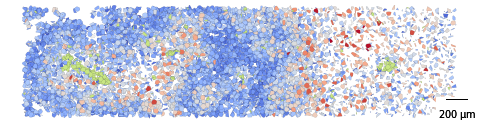

In [77]:
xlim = (11200, 15200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    WR_adata,
    sample='SL035B',
    clusters = ['GW-like 1','GW-like 8','GW-like 6','Endothelial'],
    cluster_key='m-states',
    key='module_2',
    cmap='coolwarm',
    xlim=xlim,
    ylim=ylim,
    bgval_quant=0,
    alpha=1,
    show_axis=False,
    normalize_values=False,
    vmin=np.quantile(WR_adata.obsm['module_2'].min(), .05),
    vmax=np.quantile(WR_adata.obsm['module_2'],.95),
    #figsize=(5,5),mquant=0.995,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=True,
    palette= {'Endothelial':'#C8E683',  'Mural': '#C8E683'},
    ax=ax,
)

plt.savefig('figures/module_2.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 156221 cells left


module_4 (156221, 387) KeysView(AxisArraysView with keys: X_R, X_pca, spatial, module_0, module_2, module_4)
1.2415121 -0.30467916


INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 6394 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:565: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_gray.plot(color=gray_color,edgecolor='black',linewidth=0.05,ax=ax1,rasterized=True,facecolor=facecolor, alpha=alpha_gray)
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 351 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


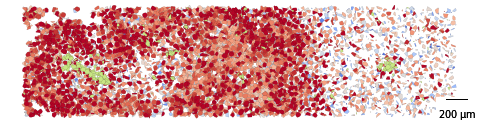

In [76]:
xlim = (11200, 15200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    WR_adata,
    sample='SL035B',
    clusters = ['GW-like 1','GW-like 8','GW-like 6','Endothelial'],
    cluster_key='m-states',
    key='module_4',
    cmap='coolwarm',
    xlim=xlim,
    ylim=ylim,
    bgval_quant=0,
    alpha=1,
    show_axis=False,
    normalize_values=False,
    vmin=np.quantile(WR_adata.obsm['module_4'].min(), .05),
    vmax=np.quantile(WR_adata.obsm['module_4'],.95),
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=True,
    palette= {'Endothelial':'#C8E683',  'Mural': '#C8E683'},
    ax=ax,
)

plt.savefig('figures/module_4.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 156221 cells left


module_2 (156221, 387) KeysView(AxisArraysView with keys: X_R, X_pca, spatial, module_0, module_2, module_4)
0.6353507 -0.25160763


INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 6394 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 351 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


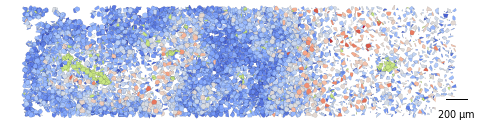

In [38]:
xlim = (11200, 15200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    WR_adata,
    sample='SL035B',
    clusters = ['GW-like 1','GW-like 8','GW-like 6','Endothelial'],
    cluster_key='m-states',
    key='module_2',
    cmap='coolwarm',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    bgval_quant=0,
    show_axis=False,
    #figsize=(5,5),mquant=0.995,
    ax = ax
)

sp.pl.plot_polygons(
    alldata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=True,
    palette= {'Endothelial':'#C8E683',  'Mural': '#C8E683'},
    ax=ax,
)

plt.savefig('figures/module_2.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

INFO:root:First filter, 156221 cells left


module_4 (156221, 387) KeysView(AxisArraysView with keys: X_R, X_pca, spatial, module_0, module_2, module_4)
1.2415121 -0.30467916


INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 6394 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 351 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


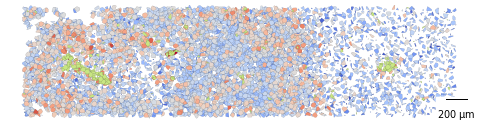

In [40]:
xlim = (11200, 15200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_obsm(
    WR_adata,
    sample='SL035B',
    clusters = ['GW-like 1','GW-like 8','GW-like 6','Endothelial'],
    cluster_key='m-states',
    key='module_4',
    cmap='coolwarm',
    bgval_quant=0,
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),mquant=0.995,
    ax = ax

)

sp.pl.plot_polygons(
    alldata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=True,
    palette= {'Endothelial':'#C8E683',  'Mural': '#C8E683'},
    ax=ax,
)

plt.savefig('figures/module_4.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

In [ ]:
genes = ["NHLH1", "STMN2", "SOX2"]
plt.figure(figsize=(8, 8))
cgplot.scatterm(
    xy, 
    c=[ws.Expression[:, ws.Gene == gene].flatten() for gene in genes], 
    cmaps=["darkmagenta", "royalblue", "limegreen"], 
    s=0.1, 
    bgval=0, 
    max_percentile=95, 
    labels=genes, 
    legend=None
)
plt.axis("off")
None

In [ ]:
def scatterm(xy: np.ndarray, *, c: List[np.ndarray], cmaps: List[Any], bgval: Any = None, labels = None, legend = "outside", max_percentile: float = 98, g: np.ndarray = None, gcolor: str = "thistle", galpha: float = 0.1, glinewidths: float = 0.25, **kwargs) -> None:
    n_cells = xy.shape[0]
    fig = plt.gcf()
    area = np.prod(fig.get_size_inches())
    marker_size = 100_000 / n_cells * (area / 25)

    ordering = np.random.permutation(n_cells)
    c = np.array(c)[:, ordering]
    xy = xy[ordering, :]

    winners = np.argmax(c, axis=0)
    max_val = np.percentile(c, max_percentile, axis=1)
    assert np.all(max_val > 0), f"{max_percentile}th percentile is zero (increase max_percentile to fix)"

    c = np.clip(c, 0, max_val)
    colors = np.max(c, axis=0)

    final_cmaps = []
    for cmap in cmaps:
        if isinstance(cmap, str):
            try:
                final_cmaps.append(Colorizer(cmap).cmap)
            except ValueError:
                try:
                    final_cmaps.append(plt.cm.get_cmap(cmap))
                except ValueError:
                    if cmap in mcolors.BASE_COLORS or cmap in mcolors.TABLEAU_COLORS or cmap in mcolors.CSS4_COLORS:
                        final_cmaps.append(mcolors.LinearSegmentedColormap.from_list(name=cmap, colors=["white", cmap]))
                    else:
                        raise ValueError("Unknown color or colormap " + cmap)
        else:
            final_cmaps.append(cmap)

    data = np.zeros((n_cells, 4))
    for i in range(n_cells):
        if bgval is not None and colors[i] == bgval:
            data[i] = (0.8, 0.8, 0.8, 1)
        else:
            data[i] = final_cmaps[winners[i]](colors[i])

    s = kwargs.pop("s", marker_size)
    lw = kwargs.pop("lw", 0)

    if bgval is not None:
        bgpoints = colors == bgval
        plt.scatter(xy[bgpoints, 0], xy[bgpoints, 1], c="lightgrey", s=s, lw=lw, **kwargs)
        plt.scatter(xy[~bgpoints, 0], xy[~bgpoints, 1], c=data[~bgpoints], s=s, lw=lw, **kwargs)
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=data, s=s, lw=lw, **kwargs)
    if g is not None:
        ax = plt.gca()
        _draw_edges(ax, xy, g, gcolor, galpha, glinewidths)

    ax = plt.gca()
    if legend not in [None, False]:
        legend_colors = [cmap(0.8) for cmap in final_cmaps]
        hidden_lines = [Line2D([0], [0], color=clr, lw=4) for clr in legend_colors]
        if legend == "outside":
            ax.legend(hidden_lines, labels, loc='center left', bbox_to_anchor=(1, 0.5))
        else:
            ax.legend(hidden_lines, labels, loc=legend)
